<a href="https://colab.research.google.com/github/tschelli/food_sales_predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Food Sales Predictions Project
Coding Dojo Data Science Project 1

- Name: Tyler Schelling
- Start Date: 9/12/2022

---

**Data Dictionary Reference:**

Variable Name	   |  Description
-------------------|------------------
Item_Identifier	   |  Unique product ID
Item_Weight	       |  Weight of product
Item_Fat_Content	| Whether the product is low fat or regular
Item_Visibility	|The percentage of total display area of all products in a store allocated to the particular product
Item_Type	|The category to which the product belongs
Item_MRP	|Maximum Retail Price (list price) of the product
Outlet_Identifier	|Unique store ID
Outlet_Establishment_Year	|The year in which store was established
Outlet_Size|	The size of the store in terms of ground area covered
Outlet_Location_Type	|The type of area in which the store is located
Outlet_Type	|Whether the outlet is a grocery store or some sort of supermarket
Item_Outlet_Sales	|Sales of the product in the particular store. This is the target variable to be predicted.

## Mount Drive | Import Libraries | Load Data
- Section last updated: 9/28/2022

### Mounting the Google drive

In [1]:
#Dataset is stored via Google drive. Mount the drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries

In [2]:
import pandas as pd
import numpy as np

import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

import math

### Load the data
 *Note: [Original Data Source](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)*

In [3]:
#Load the data and examine the dataset we will be using
filename = '/content/drive/MyDrive/02. Life/Coding Dojo/00 Datasets/sales_predictions.csv'
df = pd.read_csv(filename)

## Exploring and Cleaning the Data
- Section last updated: 9/29/2022

### Display First 5 Rows 

In [4]:
#The .head() method will return the first 5 rows of our dataset.
#We will use .head() to gain a quick familiarity of our dataset.
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- Data appears to have been loaded correctly.

### Display Dataframe Info

In [5]:
#The .info() method will print a concise summary of the Dataframe.
#This method includes information on the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 1. How many rows and columns are in the dataframe?

In [6]:
#The .shape attribute returns the dimensions of the Dataframe in a tuple (rows, columns).
df.shape
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset contains 8523 rows and 12 columns.


### 2. What are the datatypes of each variable?

In [7]:
#The .dtypes attribute returns a Series with the data type of each column.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

- Across each column, no inconsistent datatypes were found. 

### 3. Are there duplicates? If so, drop any duplicates.

In [8]:
#The .duplicated() method returns a boolean Series denoting duplicate rows
#Using .sum(), we can sum the 'True's that were returned for each duplicated row
df.duplicated().sum()

0

- No duplicated rows were found in our data.
- If duplicates were present, we would use `df.drop_duplicates(keep='first', inplace= True)` to drop them from our dataset.

### 4. Identify missing values.

In [9]:
#The .isna() method detects missing values. It will return a boolean same-sized object indicating if the values are NA.
#Using .sum(), we can sum the 'True's that are returned for missing values in each column.
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

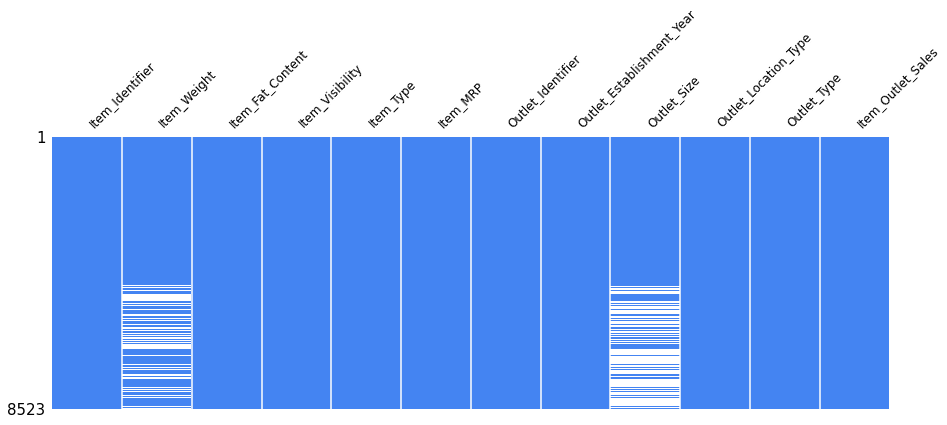

In [10]:
#The nullity matrix chart helps us understand the distribution of data within the whole dataset by column at the same time. 
msno.matrix(df, figsize = (15,5), fontsize = 12, color = [.27,.52,.95], sparkline = False, sort = 'descending');

We have identified that 2 columns with missing values:
- Item_Weight has 1463 missing values
- Outlet_Size has 2410 missing values

### 5. Decide on how to address the missing values. Explain your judgement and choice.

#### Item_Weight Missing Values

`Item_Weight` has 1463 missing values.

In [11]:
#The .isna() method will return the total count of null values in the 'Item_Weight' column by utilizing .sum()
df['Item_Weight'].isna().sum()

1463

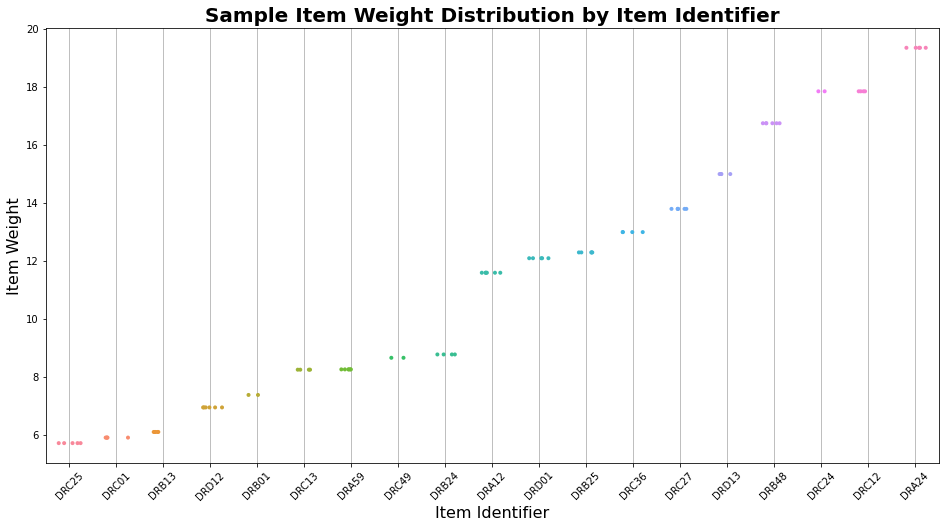

In [12]:
#Scatterplot of the Item_Weight distribution by Item_Identifier. Used a sample of the first 100 lines of sorted data by weight to make the chart more readable. 
plt.figure(figsize = (16, 8))

sns.stripplot(data=df.sort_values(by = ['Item_Identifier']).head(100).sort_values(by = ['Item_Weight']), x='Item_Identifier', y='Item_Weight', size = 4, jitter = .25)

plt.title('Sample Item Weight Distribution by Item Identifier', fontsize = 20, weight='bold')
plt.xlabel('Item Identifier', fontsize = 16)
plt.ylabel('Item Weight', fontsize = 16)
plt.xticks(fontsize = 10, rotation=45)
plt.yticks(fontsize = 10);

plt.grid(axis='x')
plt.show;

- Scatterplot of a sample of `Item_Weight`'s across `Item_Identifier`'s shows consistent `Item_Weight`'s in each `Item_Identifier` grouping.

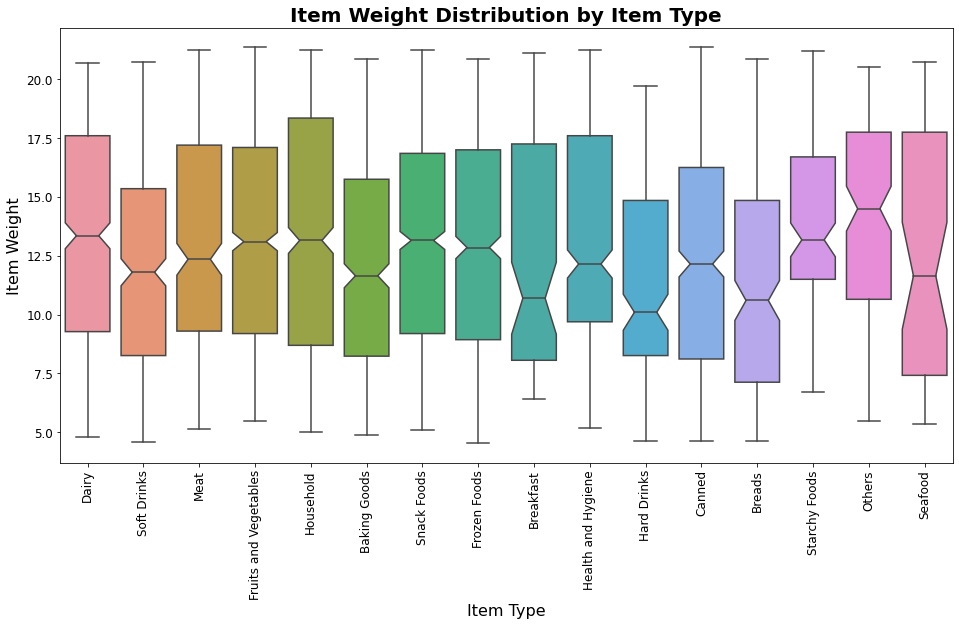

In [13]:
#Boxplot of the Item_Weight distribution by Item_Type in order to find the variation within each grouping. 
plt.figure(figsize = (16, 8))

sns.boxplot(data=df, x='Item_Type', y='Item_Weight', notch=True)

plt.title('Item Weight Distribution by Item Type', fontsize = 20, weight='bold')
plt.xlabel('Item Type', fontsize = 16)
plt.ylabel('Item Weight', fontsize = 16)
plt.xticks(fontsize = 12, rotation=90)
plt.yticks(fontsize = 12);

plt.show;

- Boxplot is used to visualize the `Item_Weight`by `Item_Type`'s and provides an indication of where the median lies of each `Item_Type` group.

In [14]:
#Loop through the index of the Dataframe
for ind in df.index:
    #Create a variable to hold the Item_Identifier of the current index
    item_id = df.loc[ind,'Item_Identifier']

    #Check if the location of the Item_Weight at the index is null
    #Create a filter to filter out only 'Item_Identifier' values equivalent to the item_id
    #Replace the null value with the .mean() of the 'Item_Weight' for the current 'Item_Identifier'. Values across 'Item_Identifier's are consistent.
    if df.isnull().loc[ind, 'Item_Weight']:
        item_filter = df['Item_Identifier'] == item_id
        df.loc[ind, 'Item_Weight'] = df[item_filter]['Item_Weight'].mean()

        #Additional check for the case of the null 'Item_Weight' being the only value for the 'Item_Identifier'
        #Create a new filter to filter out only the 'Item_Type' values of the current index.
        #Replace the null values with the .mean() of the 'Item_Weight' for the item's 'Item_Type'
        if math.isnan(df[item_filter]['Item_Weight'].mean()):
            type_filter = df['Item_Type'] == df.loc[ind, 'Item_Type']
            df.loc[ind, 'Item_Weight'] = df[type_filter]['Item_Weight'].median()

- Unique `Item_Identifier`'s have consistent `Item_Weight`'s.
    - The logic that was run updates null `Item_Weight` values with it's relevant `Item_Identifier`'s `Item_Weight` value.
- In the case that the `Item_Identifier` only had null `Item_Weight` entries, the `Item_Weight` will be filled using the median `Item_Weight` of it's `Item_Type`.

In [15]:
df['Item_Weight'].isna().sum()

0

- No null values in `Item_Weight` left.

#### Outlet_Size Missing Values

`Outlet_Size` has 2410 missing values.
- Out of 8523 rows, this is a significant portion of the data (28.3%).


##### Missing Value Overview - Outlet_Size

In [16]:
#The .unique() method will return all values in the 'Outlet_Size' column.
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [17]:
#The .replace() method will replace 'High' with 'Large' inside the 'Outlet_Size' column in order to keep the language consistent.
df['Outlet_Size'].replace('High', 'Large', inplace = True)
print(df['Outlet_Size'].unique())

['Medium' nan 'Large' 'Small']


- For consistency in language, "High" was replaced with "Large"
- `Outlet_Size` contains three unique values: Small, Medium, Large

In [18]:
#The .groupby() method utilizes a lambda function to find the NaN 'Outlet_Size' values grouped by 'Outlet_Type' and 'Outlet_Location_Type'. 
df.groupby(['Outlet_Type','Outlet_Location_Type'])[['Outlet_Size']].apply(lambda x: x.isnull().sum())

Outlet_Size
Outlet_Type       Outlet_Location_Type             
Grocery Store     Tier 1                          0
                  Tier 3                        555
Supermarket Type1 Tier 1                          0
                  Tier 2                       1855
                  Tier 3                          0
Supermarket Type2 Tier 3                          0
Supermarket Type3 Tier 3                          0

- Two categories of missing `Outlet_Size` data.
    - Grocery Store: Tier 3
    - Supermarket Type1: Tier 2

##### Grocery Store Missing Values

In [19]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type' and 'Outlet_Location_Type' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type                            
Grocery Store     Tier 1                  179694.09         340.33
                  Tier 3                  188340.17         339.35
Supermarket Type1 Tier 1                 4302364.98        2313.10
                  Tier 2                 6472313.71        2323.99
                  Tier 3                 2142663.58        2299.00
Supermarket Type2 Tier 3                 1851822.83        1995.50
Supermarket Type3 Tier 3                 3453926.05        3694.04

In [20]:
#The .value_counts() method will provide the counts of 'Outlet_Size' filtered by only Grocery Store 'Outlet_Type's.
store_filter = df['Outlet_Type'] == 'Grocery Store'
df[store_filter].value_counts('Outlet_Size')

Outlet_Size
Small    528
dtype: int64

- Sales data for the missing values in Grocery Store - Tier 3 indicate that the `Outlet_Size` is nearly identical to Grocery Store - Tier 1.
    - All `Outlet_Size`'s for Grocery Store's are Small.
    - Using this information, the missing values with the Grocery Store `Outlet_Type` will be imputed as Small.

In [22]:
#Update null values with 'Small' with the Outlet_Type 'Grocery Store'
df.loc[store_filter & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

- Separately, the following can be noted:
    - Grocery Store Tier 3 only contained missing values
    - Total Sales and Avg Sales for Grocery Store Tier 3 are close to the sales values for Grocery Store Tier 1.

- Without further knowledge of the `Outlet_Location_Type` column from a SME, it is safe to assume that these rows were incorrectly identified as Tier 3 and will be imputed as Tier 1.

In [28]:
#Replace grocery store Outlet_Location_Type Tier 3 with Tier 1
df.loc[store_filter, 'Outlet_Location_Type'] = df.loc[store_filter, 'Outlet_Location_Type'].replace('Tier 3', 'Tier 1')
df[store_filter]['Outlet_Location_Type'].unique()

array(['Tier 1'], dtype=object)

- Missing values in `Outlet_Size` of Grocery Store have been imputed.
- Grocery Store `Outlet_Location_Type` Tier 3 has been updated to Tier 1.

##### Supermarket Type1 Missing Values

In [29]:
#The .groupby() method utilizes a lambda function to find the NaN 'Outlet_Size' values grouped by 'Outlet_Type' and 'Outlet_Location_Type'. 
df.groupby(['Outlet_Type','Outlet_Location_Type'])[['Outlet_Size']].apply(lambda x: x.isnull().sum())

Outlet_Size
Outlet_Type       Outlet_Location_Type             
Grocery Store     Tier 1                          0
Supermarket Type1 Tier 1                          0
                  Tier 2                       1855
                  Tier 3                          0
Supermarket Type2 Tier 3                          0
Supermarket Type3 Tier 3                          0

In [177]:
df['Outlet_Location_Type'].value_counts()

Tier 1    1083
Name: Outlet_Location_Type, dtype: int64

In [24]:
#
store_filter2 = df['Outlet_Type'] == 'Supermarket Type1'
tier_filter = df['Outlet_Location_Type'] == 'Tier 2'
df[tier_filter & store_filter2].value_counts('Outlet_Size')

Outlet_Size
Small    930
dtype: int64

- Only `Outlet_Size` Small is applied to values to Supermarket Type1 Tier 2 Outlets.
    - Before imputing all missing values in this category as Small, a further investigation into the sales comparison is warranted.

In [30]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type' and 'Outlet_Location_Type' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type Outlet_Size                            
Grocery Store     Tier 1               Small          368034.27         339.83
Supermarket Type1 Tier 1               Medium        2183969.81        2348.35
                                       Small         2118395.17        2277.84
                  Tier 2               Small         2268122.94        2438.84
                  Tier 3               Large         2142663.58        2299.00
Supermarket Type2 Tier 3               Medium        1851822.83        1995.50
Supermarket Type3 Tier 3               Medium        3453926.05        3694.04

In [34]:
#The .groupby() method will sum the 'Item_Outlet_Sales' values grouped by 'Outlet_Type' and 'Outlet_Location_Type' with a displayed .agg of both the average sales and total sales.
round(df.groupby(['Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].agg(['sum', 'mean']).rename(columns = {'sum':'Total Sales', 'mean':'Average Sales'}),2)

Total Sales  Average Sales
Outlet_Type       Outlet_Location_Type                            
Grocery Store     Tier 1                  368034.27         339.83
Supermarket Type1 Tier 1                 4302364.98        2313.10
                  Tier 2                 6472313.71        2323.99
                  Tier 3                 2142663.58        2299.00
Supermarket Type2 Tier 3                 1851822.83        1995.50
Supermarket Type3 Tier 3                 3453926.05        3694.04

- The sales information provides no relevant insights.
- Without a SME to provide additional information on the matter, it is safe to assume that all Supermarket Type1 Tier 2 outlets have an `Outlet_Size` of Small.

In [35]:
# Update null values with 'Small' with the Outlet_Type 'Supermarket Type1'
df.loc[store_filter2 & (df['Outlet_Size'].isnull()), 'Outlet_Size'] = 'Small'
df[store_filter]['Outlet_Size'].isna().sum()

0

- Missing values in `Outlet_Size` of Supermarket Type1 have been imputed.

---

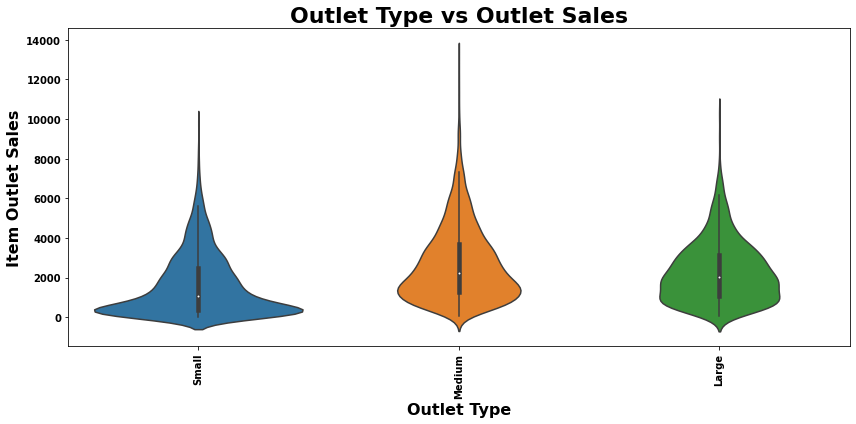

In [31]:
plt.figure(figsize = (12, 6))

sns.violinplot(data=df.sort_values(by=['Outlet_Size'], ascending = False), x='Outlet_Size',y='Item_Outlet_Sales')

plt.title('Outlet Type vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Type', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

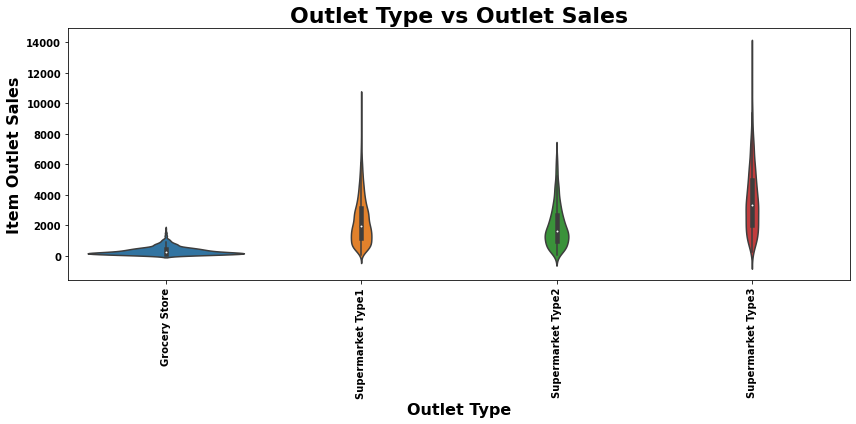

In [32]:
plt.figure(figsize = (12, 6))

sns.violinplot(data=df.sort_values(by=['Outlet_Type']), x='Outlet_Type',y='Item_Outlet_Sales')

plt.title('Outlet Type vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Type', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=90)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

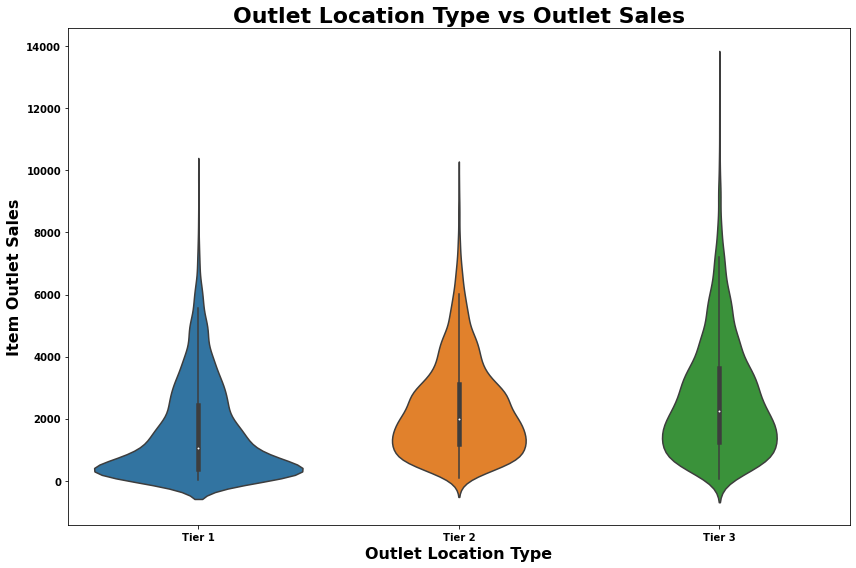

In [33]:
plt.figure(figsize = (12, 8))

sns.violinplot(data=df.sort_values(by=['Outlet_Location_Type']), x='Outlet_Location_Type',y='Item_Outlet_Sales')

plt.title('Outlet Location Type vs Outlet Sales', fontsize = 22, weight='bold')
plt.xlabel('Outlet Location Type', fontsize = 16, weight='bold')
plt.ylabel('Item Outlet Sales', fontsize = 16, weight='bold');
plt.xticks(fontsize = 10, weight='bold', rotation=0)
plt.yticks(fontsize = 10, weight='bold');

plt.tight_layout()
plt.show;

### 6. Confirm that there are no missing values after addressing them.

Using `df.isna().sum()` we will count up the total number of rows missing information from each column.

In [ ]:
# Identify missing values in each column
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7. Find and fix any inconsistent categories of data.

We will start off by using `df.info()` to make sure the datatypes of each column make sense.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Nothing sticks out as being out of the ordinary from our `df.info()`.

We can use `df[column].unique()` to look at the unique values present in each column. Suspect columns we should perform this on include: Item_Type, Item_Fat_Content, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, and Outlet_Type.
<br>
<br>
We can rule out a lot of this list given that we have already looked closely at the values in previous sections, which would leave us with **'Item_Fat_Content'** and **'Outlet_Establishment_Year'**.

In [ ]:
# Find the unique values contained within the Item_Fat_Content column.
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
# Find the unique values contained within the Outlet_Establishment_Year column.
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004])

We see the `Outlet_Establishment_Year` has consistent data, however `Item_Fat_Content` has multiple strings that represent the same value. We can clean this up using `df.replace()`.

In [ ]:
# Use df['Item_Fat_Content'].replace() to replace the inconsistent data
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat').replace('reg','Regular')
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

### 8. For any numerical columns, obtain the summary statistics of each.

Using `df.describe()` we will summarize the statistics for each numerical column.

In [ ]:
# Summarizes statistics for numerical columns
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.87,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


### Citations from Part 2
1. Referenced [Data Science Made Simple](https://www.datasciencemadesimple.com/check-count-missing-values-pandas-python-2/) to assist with question 5.
2. Referenced [Stack Overflow](https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features) to assist with question 5.
3. Referenced [Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rsub.html) to assist with question 5.
4. Referenced [Pandas API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html) to assist with question 5.


